In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import japanize_matplotlib

In [2]:
df = pd.read_csv('heisei28.csv')

In [8]:
df.columns = ['投票所名', '有権者数_男', '有権者数_女', '有権者数_計', '投票者数_男', '投票者数_女', '投票者数_計', '投票率_男', '投票率_女', '投票率_計']

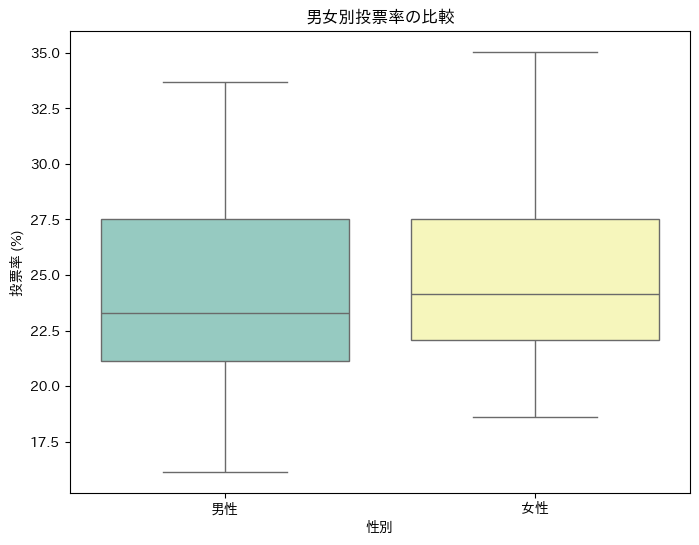

In [4]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df[['投票率_男', '投票率_女']], palette='Set3')
plt.title('男女別投票率の比較')
plt.xlabel('性別')
plt.ylabel('投票率 (%)')
plt.xticks(range(2), ['男性', '女性'])
plt.show()

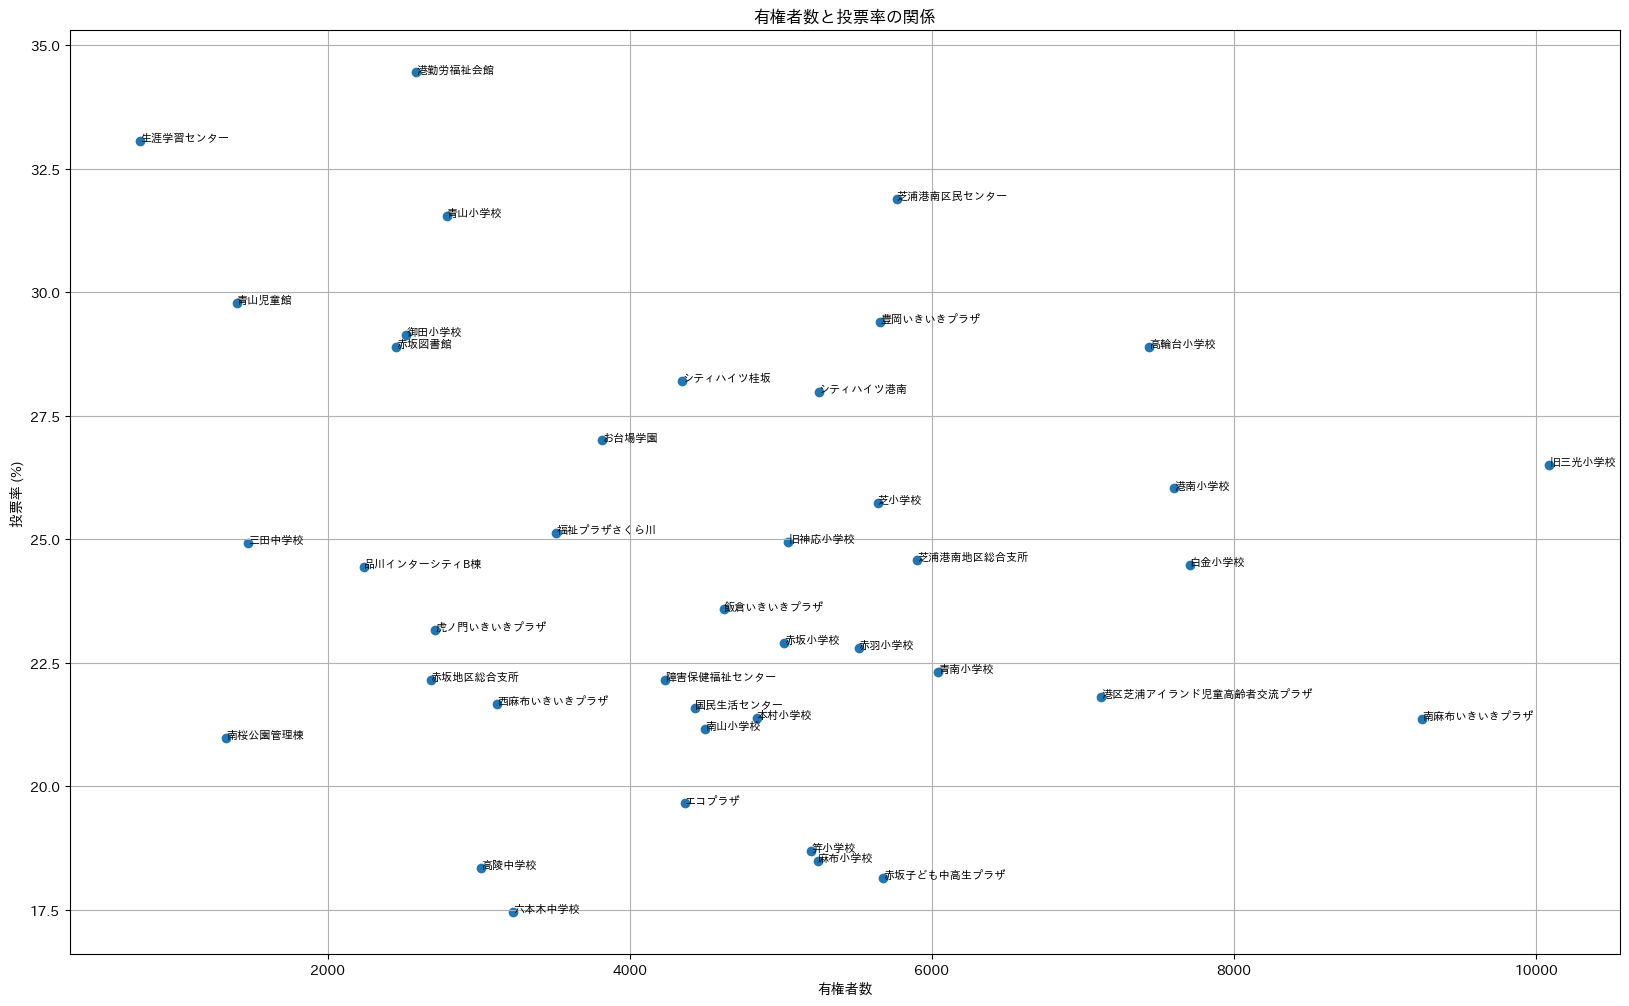

In [5]:
# 散布図を描画
plt.figure(figsize=(20, 12))
plt.scatter(df['有権者数_計'], df['投票率_計'])

# 各点に投票所名を日本語で表示
for i in range(len(df)):
    plt.text(df['有権者数_計'][i], df['投票率_計'][i], df['投票所名'][i], fontsize=8)

plt.title('有権者数と投票率の関係')
plt.xlabel('有権者数')
plt.ylabel('投票率 (%)')
plt.grid(True)
plt.show()

In [6]:
df = pd.read_csv('reiwa02.csv')

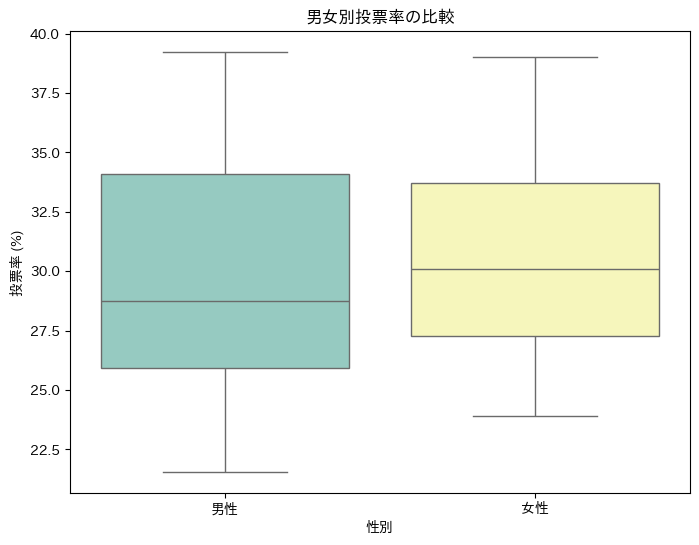

In [9]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df[['投票率_男', '投票率_女']], palette='Set3')
plt.title('男女別投票率の比較')
plt.xlabel('性別')
plt.ylabel('投票率 (%)')
plt.xticks(range(2), ['男性', '女性'])
plt.show()

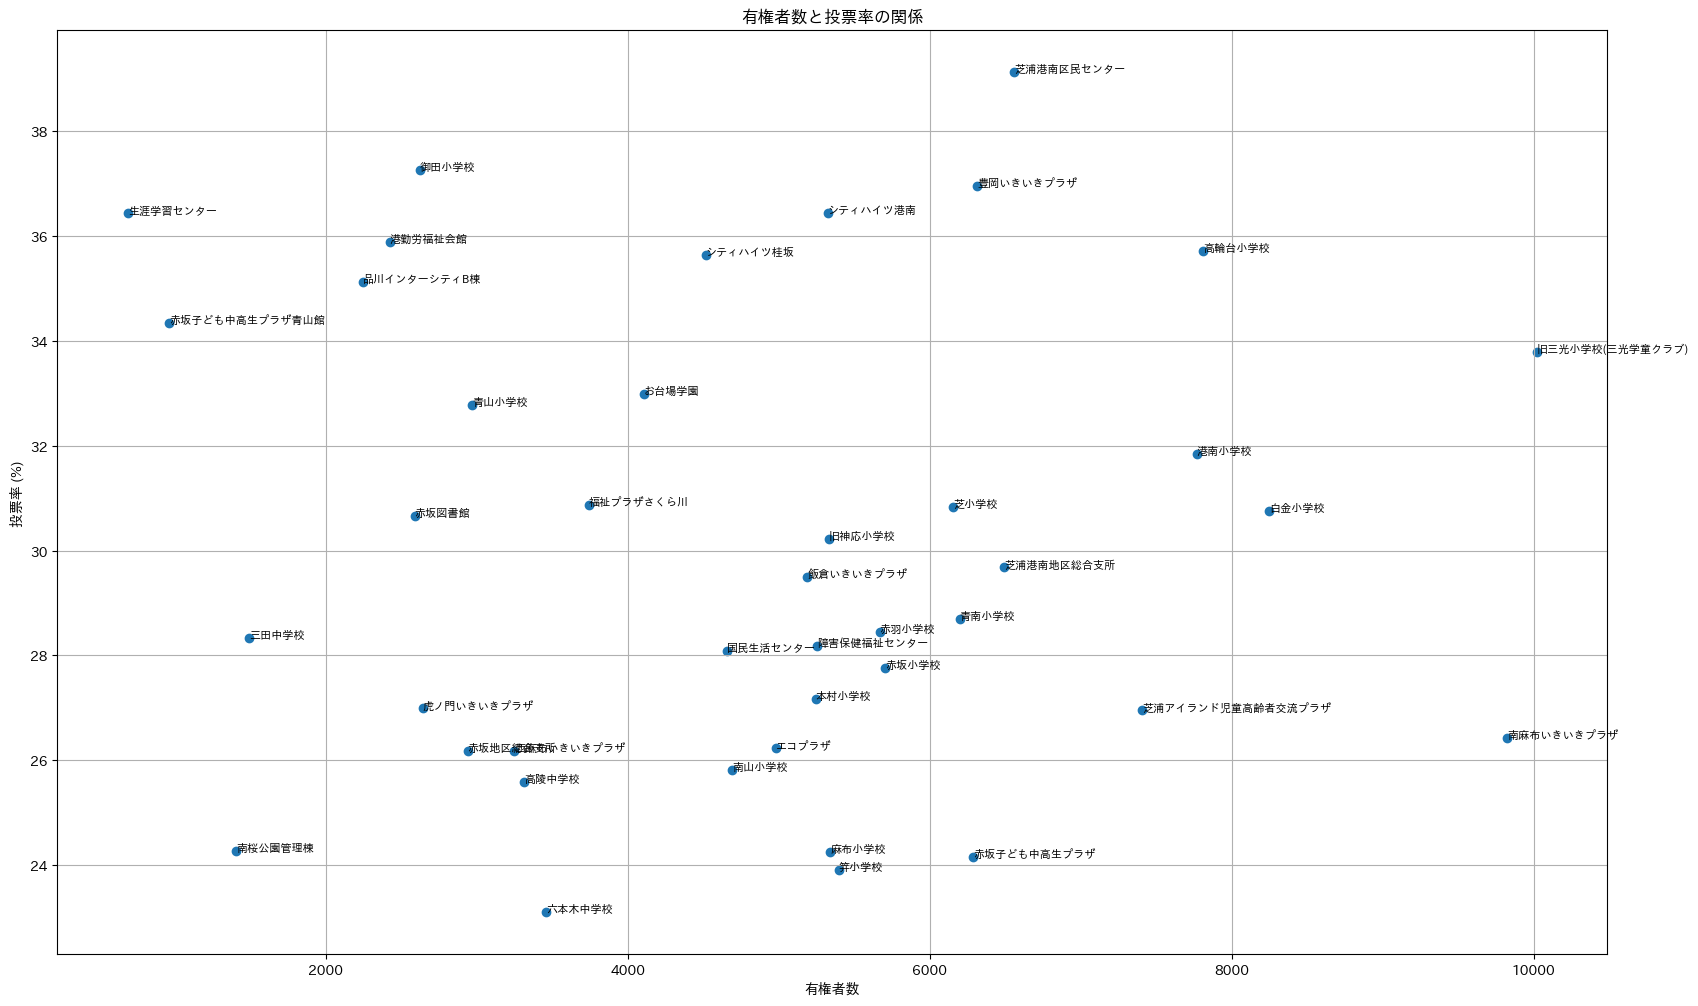

In [10]:
# 散布図を描画
plt.figure(figsize=(20, 12))
plt.scatter(df['有権者数_計'], df['投票率_計'])

# 各点に投票所名を日本語で表示
for i in range(len(df)):
    plt.text(df['有権者数_計'][i], df['投票率_計'][i], df['投票所名'][i], fontsize=8)

plt.title('有権者数と投票率の関係')
plt.xlabel('有権者数')
plt.ylabel('投票率 (%)')
plt.grid(True)
plt.show()

/var/folders/r9/t7gwy3s16y755fy1xgff7v5r0000gn/T/ipykernel_77886/2708862967.py:26: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = cm.get_cmap('tab20b', len(polling_stations))


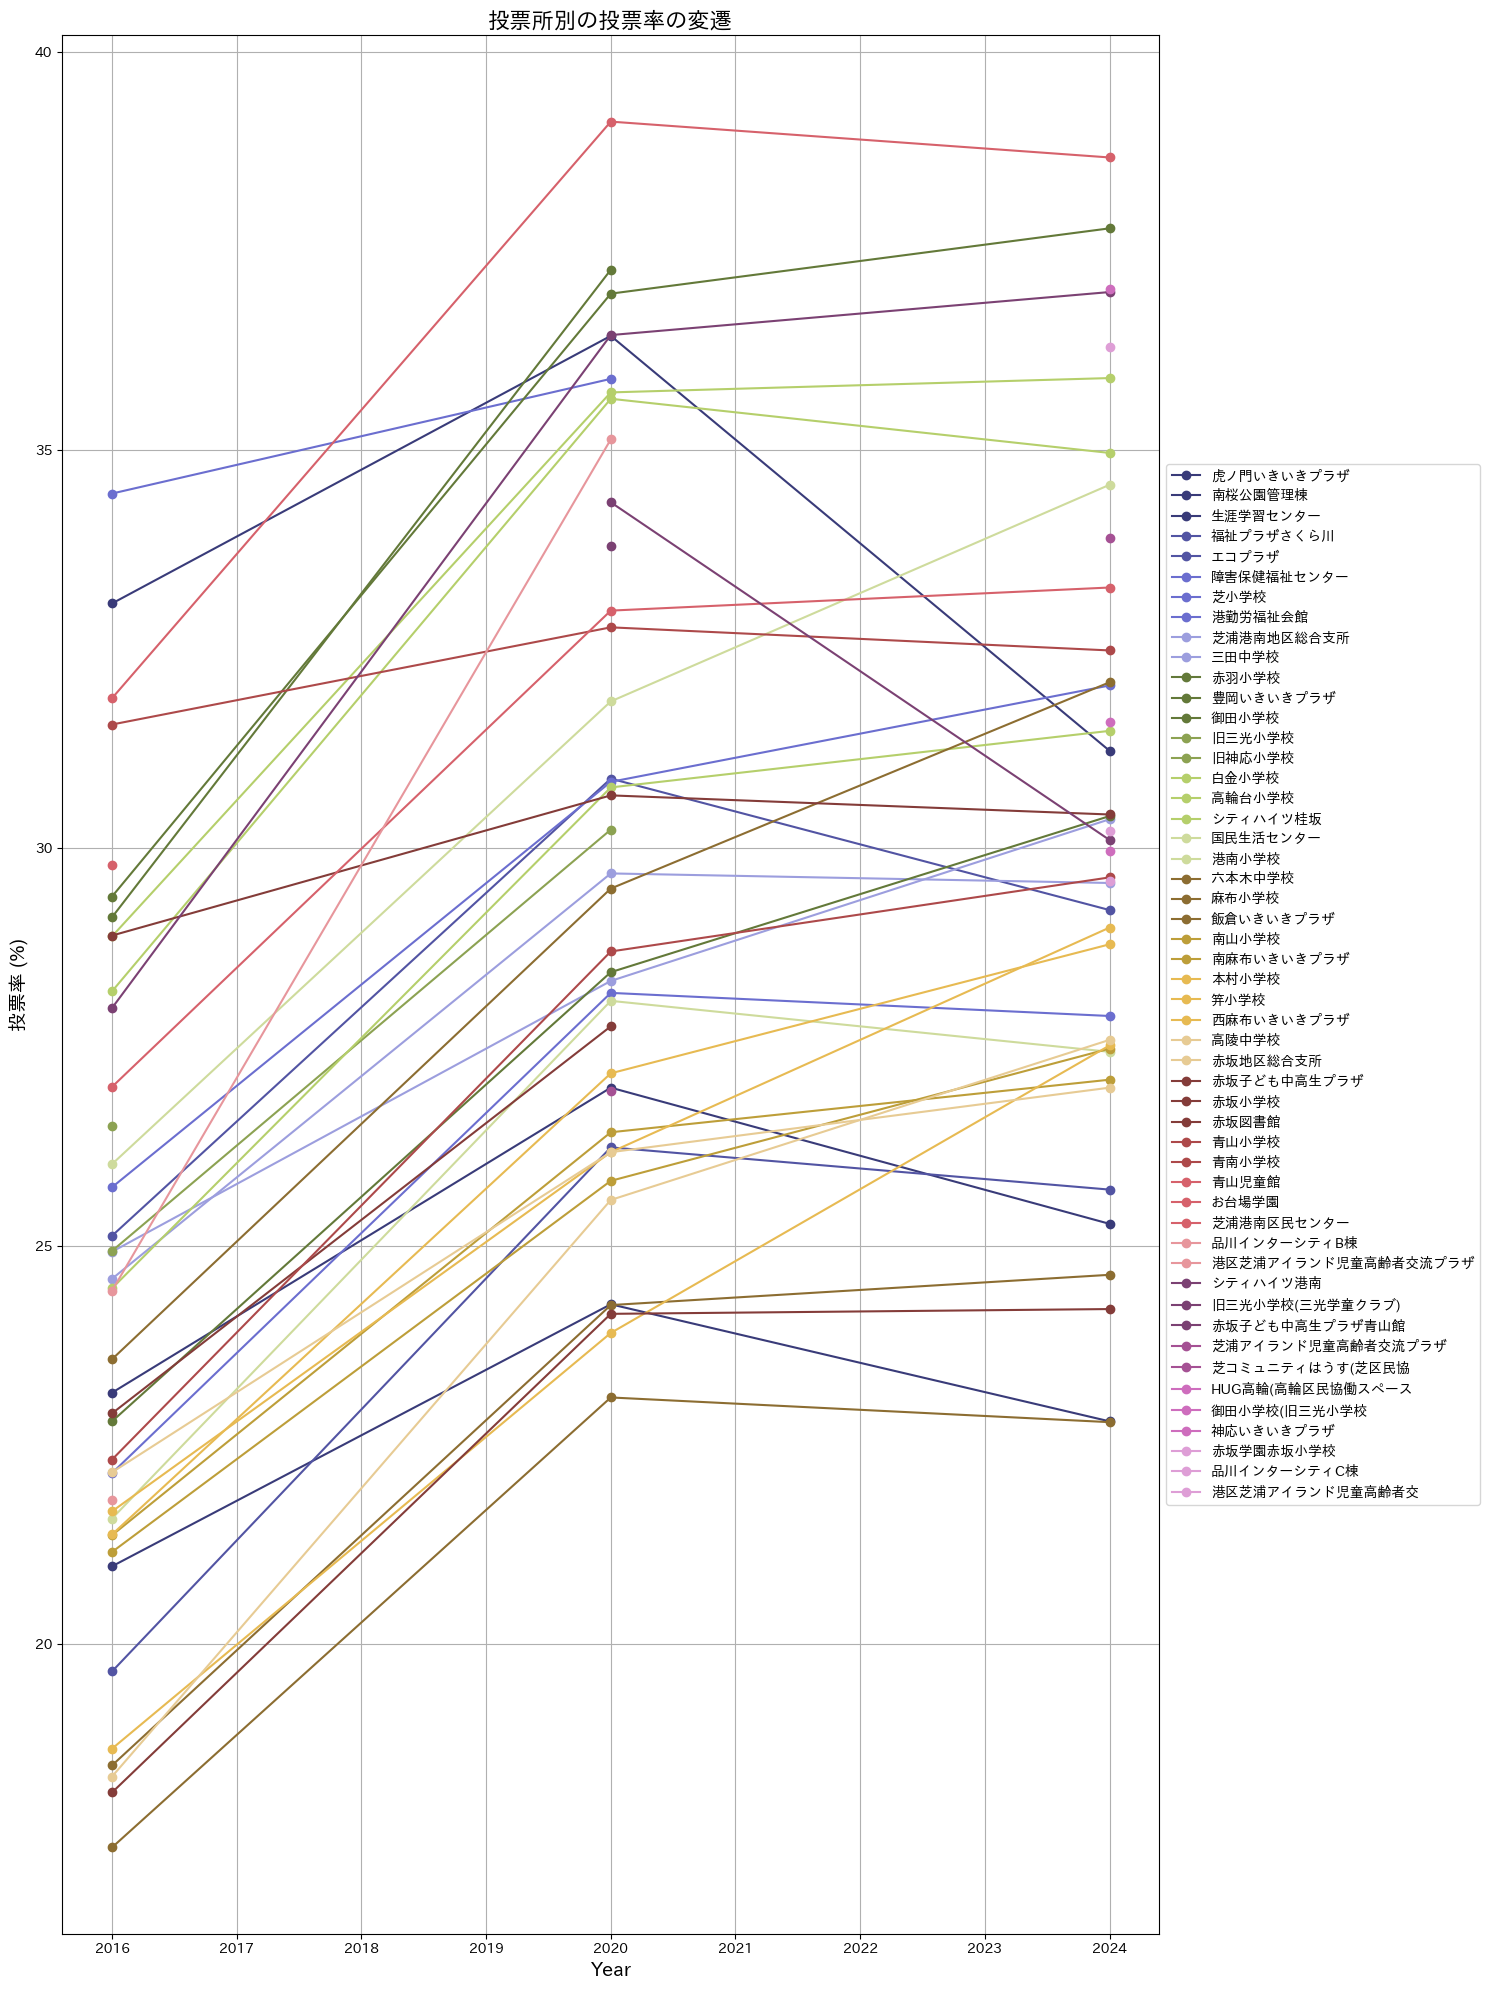

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

# CSVファイルを読み込みます
data_2016 = pd.read_csv('heisei28.csv')
data_2020 = pd.read_csv('reiwa02.csv')
data_2024 = pd.read_csv('0602hp.csv')

# 各年のデータに年の情報を追加します
data_2016['Year'] = 2016
data_2020['Year'] = 2020
data_2024['Year'] = 2024

# 全てのデータを一つのDataFrameにまとめます
data_combined = pd.concat([data_2016, data_2020, data_2024])

# 必要なカラムだけを抽出します
data_combined = data_combined[['投票所名', 'Year', '投票率 (%)_計']]

# 投票所ごとにデータをグループ化し、投票率をプロットします
polling_stations = data_combined['投票所名'].unique()

# 20色以上のカラーマップを使用するために、カラーマップを線形に拡張します
colors = cm.get_cmap('tab20b', len(polling_stations))

plt.figure(figsize=(20, 20))

for i, station in enumerate(polling_stations):
    station_data = data_combined[data_combined['投票所名'] == station]
    plt.plot(station_data['Year'], station_data['投票率 (%)_計'], marker='o', label=station, color=colors(i / len(polling_stations)))

plt.xlabel('Year', fontsize=14)
plt.ylabel('投票率 (%)', fontsize=14)
plt.title('投票所別の投票率の変遷', fontsize=16)
plt.grid(True)

# 凡例をグラフの外に配置します
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=10)
plt.tight_layout(rect=[0, 0, 0.75, 1])

plt.show()